In [1]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Veri setini okumak
df_train = pd.read_csv("train.csv",delimiter=",")
df_test = pd.read_csv("test.csv",delimiter=",")

In [3]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
df_train = df_train.drop(columns="Id")
df_test = df_test.drop(columns="Id")

In [6]:
#Toplam satır ve sütun sayısına bakmak
df_train.shape

(1460, 80)

In [7]:
df_test.shape

(1459, 79)

In [8]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df_train,n):
    eksik_değerler = df_train.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_train,20)

              Eksik Değerler  Eksik Değerler Yüzdesi
PoolQC                  1453               99.520548
MiscFeature             1406               96.301370
Alley                   1369               93.767123
Fence                   1179               80.753425
MasVnrType               872               59.726027
FireplaceQu              690               47.260274
LotFrontage              259               17.739726
GarageYrBlt               81                5.547945
GarageCond                81                5.547945
GarageType                81                5.547945
GarageFinish              81                5.547945
GarageQual                81                5.547945
BsmtExposure              38                2.602740
BsmtFinType2              38                2.602740
BsmtCond                  37                2.534247
BsmtQual                  37                2.534247
BsmtFinType1              37                2.534247
MasVnrArea                 8                0.

In [9]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df_test,n):
    eksik_değerler = df_test.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_test,30)

              Eksik Değerler  Eksik Değerler Yüzdesi
PoolQC                  1456               99.794380
MiscFeature             1408               96.504455
Alley                   1352               92.666210
Fence                   1169               80.123372
MasVnrType               894               61.274846
FireplaceQu              730               50.034270
LotFrontage              227               15.558602
GarageYrBlt               78                5.346127
GarageFinish              78                5.346127
GarageQual                78                5.346127
GarageCond                78                5.346127
GarageType                76                5.209047
BsmtCond                  45                3.084304
BsmtExposure              44                3.015764
BsmtQual                  44                3.015764
BsmtFinType2              42                2.878684
BsmtFinType1              42                2.878684
MasVnrArea                15                1.

<Axes: >

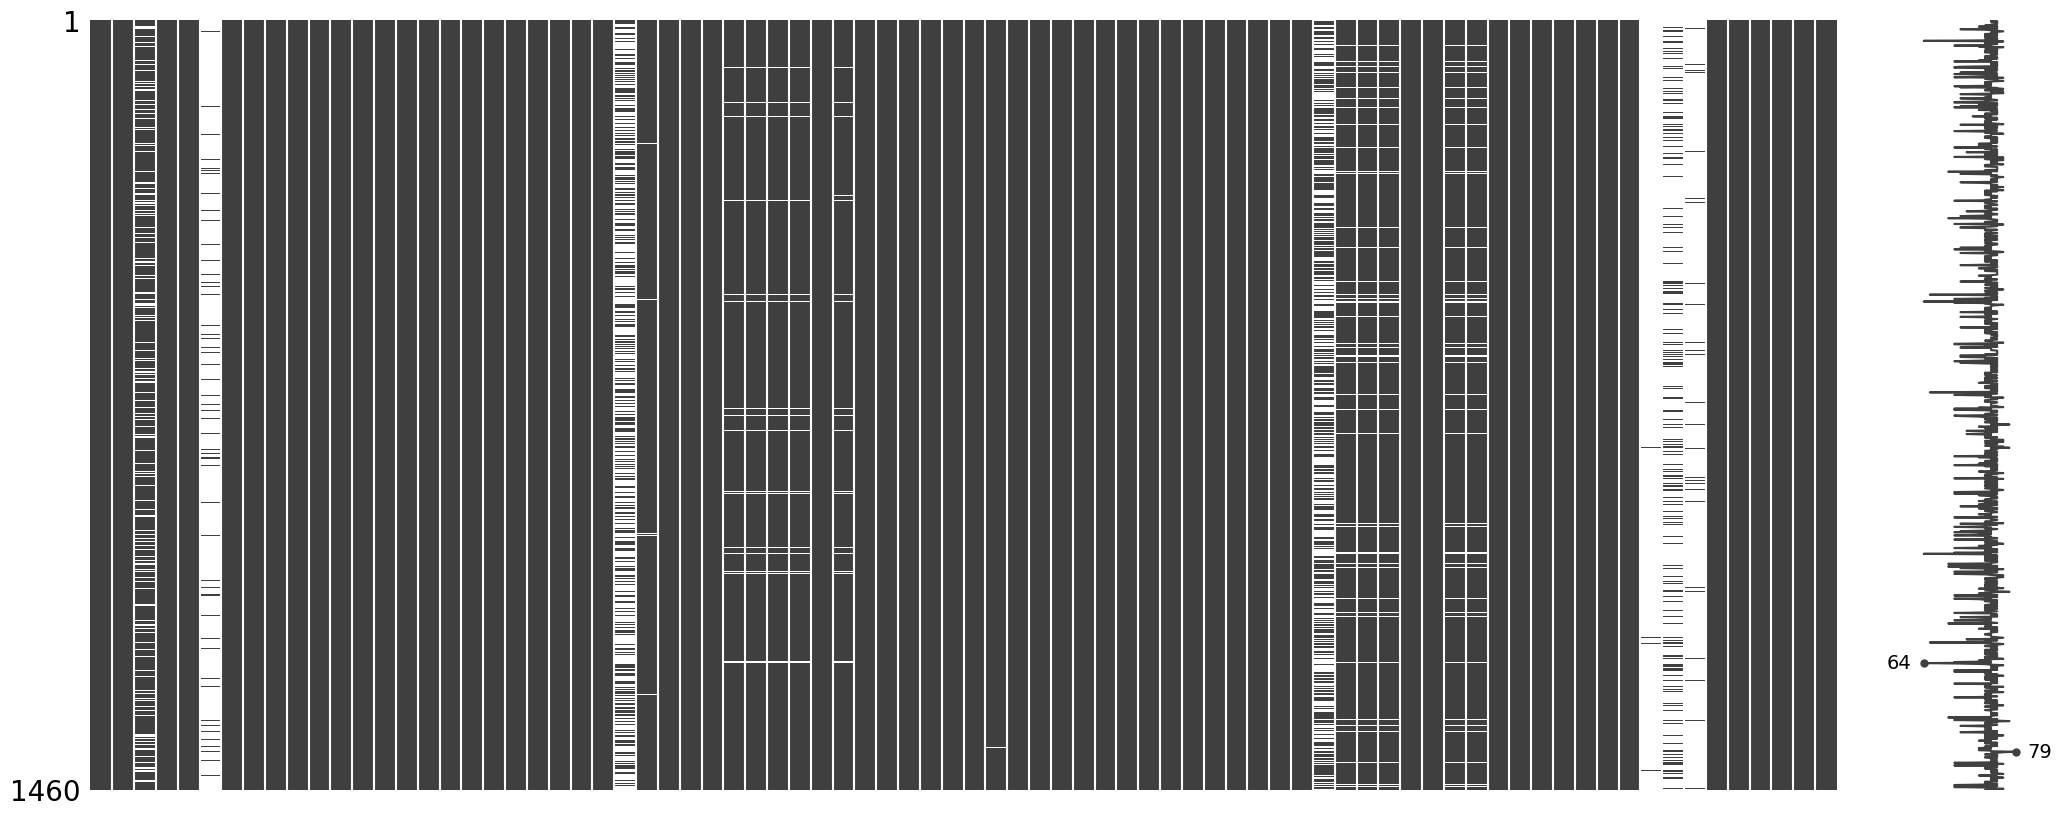

In [10]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_train)

In [11]:
# Toplam kaç tane eksik değer var
df_train.isnull().sum().sum()

7829

In [12]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.
# test
def eksik_verileri_doldur(df_test):
    # sıfır ile doldur
    df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
    # ortalama ile doldur
    #df_test[''] = df_test[''].fillna(df_test[''].mean())
    # medyan ile doldur
    df_test["LotFrontage"] = df_test["LotFrontage"].fillna(df_test["LotFrontage"].median())
    # mod ile doldur
    df_test["Electrical"] = df_test["Electrical"].fillna(df_test["Electrical"].mode()[0])
    return df_test
df_test = eksik_verileri_doldur(df_test)

# train
def eksik_verileri_doldur(df_train):
    # sıfır ile doldur
    df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
    # ortalama ile doldur
    #df_train[''] = df_train[''].fillna(df_train[''].mean())
    # medyan ile doldur
    df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())
    # mod ile doldur
    df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])
    return df_train
df_train = eksik_verileri_doldur(df_train)
df_train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [13]:
garage_features = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
# test
for column in garage_features:
    df_test[column] = df_test[column].fillna("NA")
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)

# train
for column in garage_features:
    df_train[column] = df_train[column].fillna("NA")  
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)

In [14]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
# test
for column in basement_features:
    df_test[column] = df_test[column].fillna("NA") 
    
# train
for column in basement_features:
    df_train[column] = df_train[column].fillna("NA") 

In [15]:
# test
df_test["Fence"] = df_test["Fence"].fillna("NA")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("NA")
df_test["PoolQC"] = df_test["PoolQC"].fillna("NA")
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("NA")
df_test["Alley"] = df_test["Alley"].fillna("NA")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("NA")

# train
df_train["Fence"] = df_train["Fence"].fillna("NA")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("NA")
df_train["PoolQC"] = df_train["PoolQC"].fillna("NA")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("NA")
df_train["Alley"] = df_train["Alley"].fillna("NA")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("NA")

In [16]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı_test = df_test.isnull().sum().sum()
print("Eksik verilerin toplamı test:",eksik_verilerin_toplamı_test)

eksik_verilerin_toplamı_train = df_train.isnull().sum().sum()
print("Eksik verilerin toplamı train:",eksik_verilerin_toplamı_train)

Eksik verilerin toplamı test: 22
Eksik verilerin toplamı train: 0


In [17]:
def eksik_data(df_test,n):
    eksik_değerler = df_test.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_test,16)

              Eksik Değerler  Eksik Değerler Yüzdesi
MSZoning                   4                 0.27416
BsmtFullBath               2                 0.13708
BsmtHalfBath               2                 0.13708
Utilities                  2                 0.13708
Functional                 2                 0.13708
BsmtFinSF1                 1                 0.06854
KitchenQual                1                 0.06854
Exterior1st                1                 0.06854
GarageCars                 1                 0.06854
GarageArea                 1                 0.06854
Exterior2nd                1                 0.06854
BsmtFinSF2                 1                 0.06854
BsmtUnfSF                  1                 0.06854
TotalBsmtSF                1                 0.06854
SaleType                   1                 0.06854
HalfBath                   0                 0.00000


In [18]:

mod_ = ["Electrical", "SaleType", "Exterior2nd", "KitchenQual","TotalBsmtSF","MSZoning","BsmtFullBath","BsmtHalfBath","Utilities","Functional","Exterior1st","BsmtUnfSF","BsmtFinSF2","GarageCars","BsmtFinSF1","GarageArea"]
# test
for column in mod_:
    df_test[column] = df_test[column].fillna(df_test[column].mode()[0])

In [19]:
# sayısal değişkenlerin listesi
numerical_features_test = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O']
print('Number of numerical variables_test: ', len(numerical_features_test))

numerical_features_train = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print('Number of numerical variables_train: ', len(numerical_features_train))

# sayısal değişkenleri görelim
df_train[numerical_features_train].head()

Number of numerical variables_test:  36
Number of numerical variables_train:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
# yıl bilgisini içeren değişkenlerin listesini tek tek bakarak da kolayca bulabiliriz ya da aşağıdaki gibi bir mantık de kullanabiliriz
year_feature_test = [feature for feature in numerical_features_test if 'Yr' in feature or 'Year' in feature]
print(year_feature_test)
year_feature_train = [feature for feature in numerical_features_train if 'Yr' in feature or 'Year' in feature]
year_feature_train

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
numerical_features_test = [i for i in numerical_features_test if i not in year_feature_test]
print('Number of numerical variables remaining df_test: ', len(numerical_features_test))

numerical_features_train = [i for i in numerical_features_train if i not in year_feature_train]
print('Number of numerical variables remaining df_train: ', len(numerical_features_train))

Number of numerical variables remaining df_test:  32
Number of numerical variables remaining df_train:  33


In [22]:
discrete_features_test=[feature for feature in numerical_features_test if len(df_train[feature].unique())<25]
print("Kesikli Değişken Sayısı: {}".format(len(discrete_features_test)))

discrete_features_train=[feature for feature in numerical_features_train if len(df_train[feature].unique())<25]
print("Kesikli Değişken Sayısı: {}".format(len(discrete_features_train)))

Kesikli Değişken Sayısı: 17
Kesikli Değişken Sayısı: 17


In [23]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df_train[feature].unique())) for feature in numerical_features_train ]

MSSubClass 15
LotFrontage 110
LotArea 1073
OverallQual 10
OverallCond 9
MasVnrArea 327
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
SalePrice 663


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [24]:
continuous_feature_test=[feature for feature in numerical_features_test if feature not in discrete_features_test]
print("Sürekli Değişken Sayısı df_test {}".format(len(continuous_feature_test)))

continuous_feature_train=[feature for feature in numerical_features_train if feature not in discrete_features_train and feature !="SalePrice"]
print("Sürekli Değişken Sayısı df_train {}".format(len(continuous_feature_train)))

Sürekli Değişken Sayısı df_test 15
Sürekli Değişken Sayısı df_train 15


In [25]:
# sayısal sürekli değişkenleri görelim
df_train[continuous_feature_train].head(3)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0


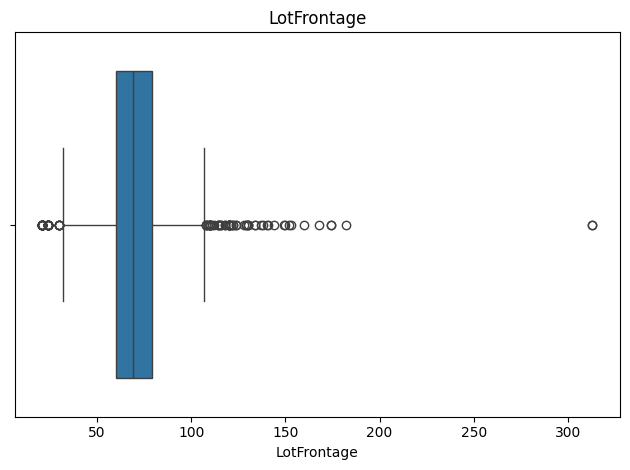

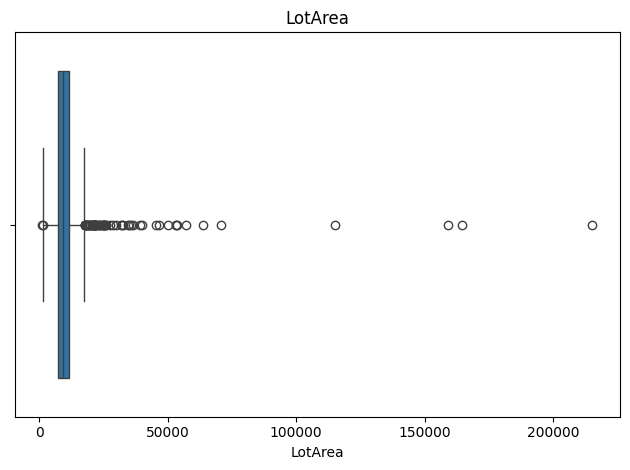

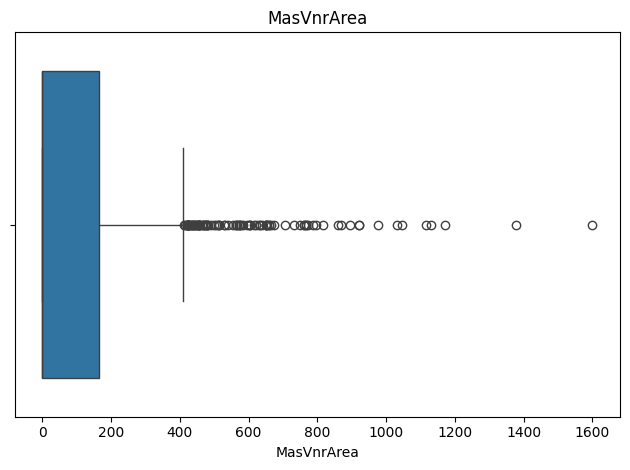

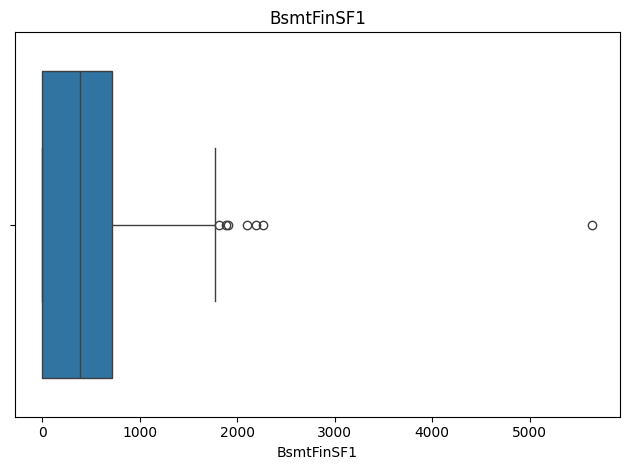

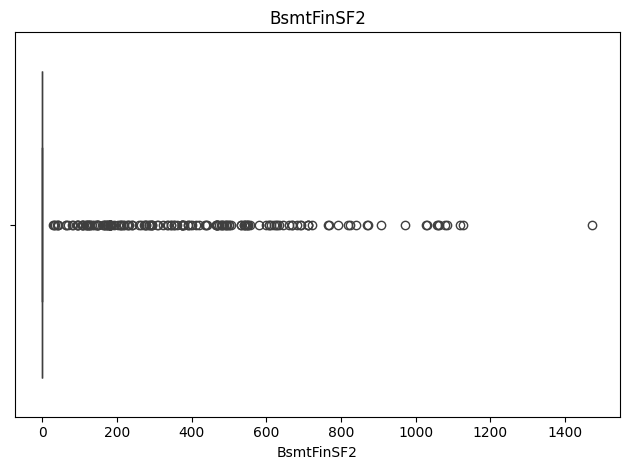

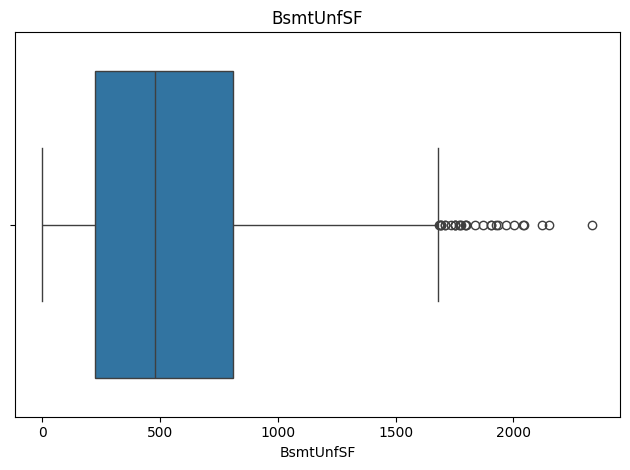

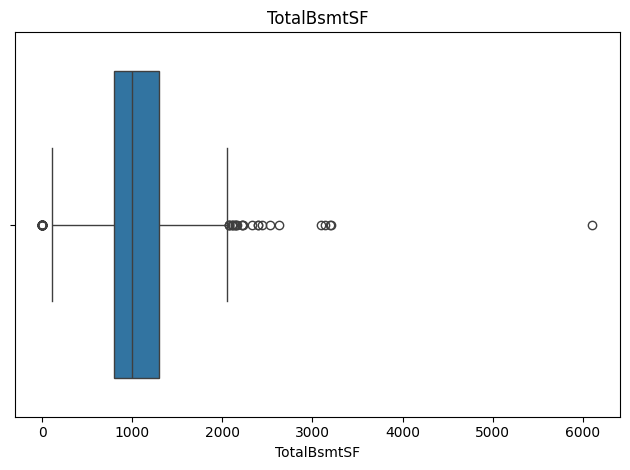

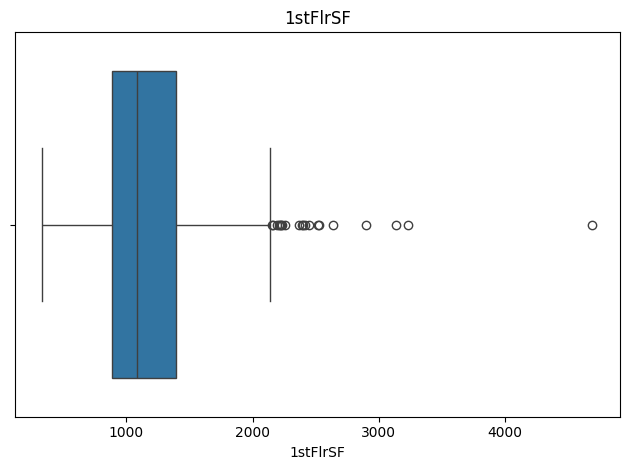

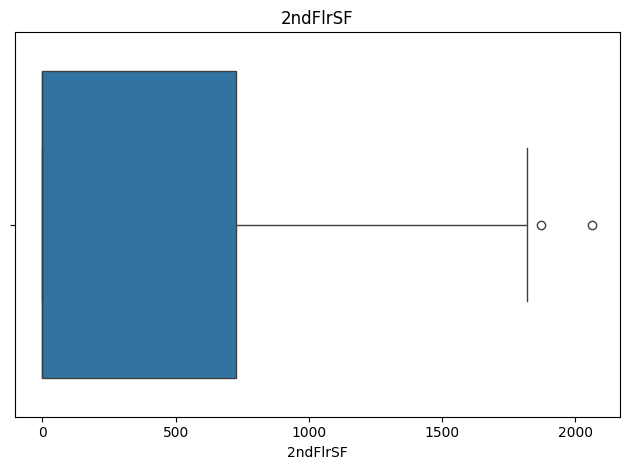

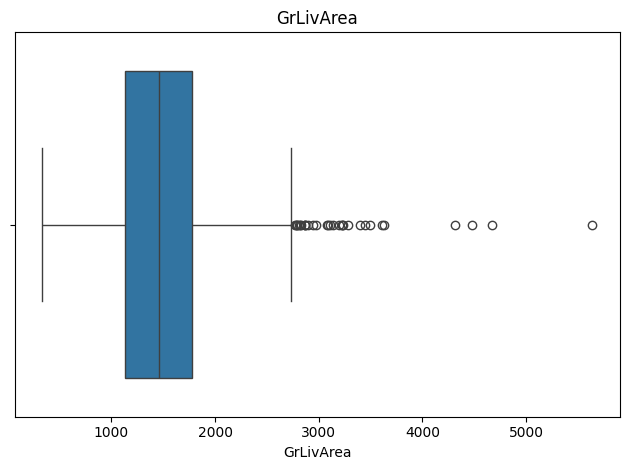

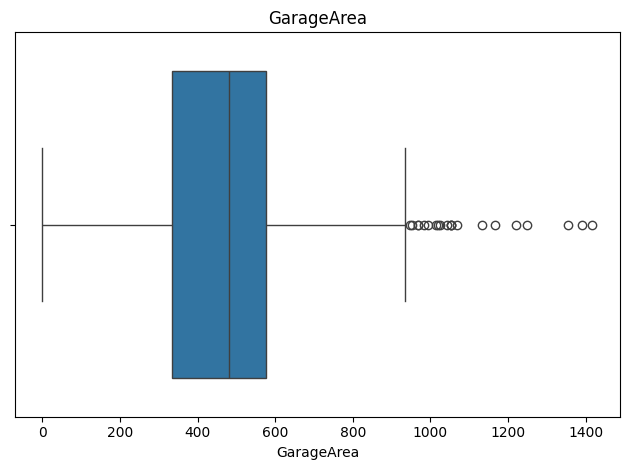

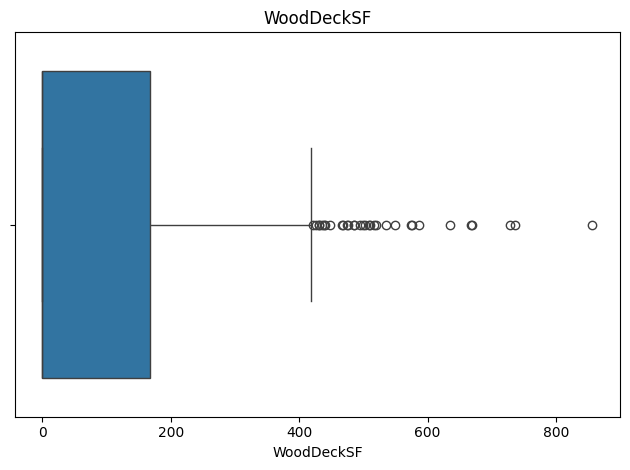

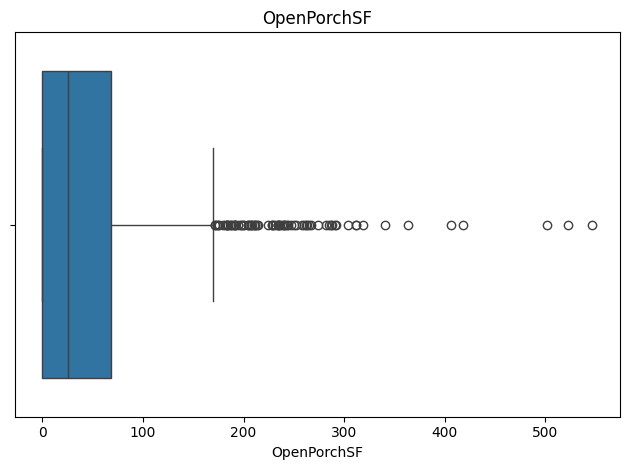

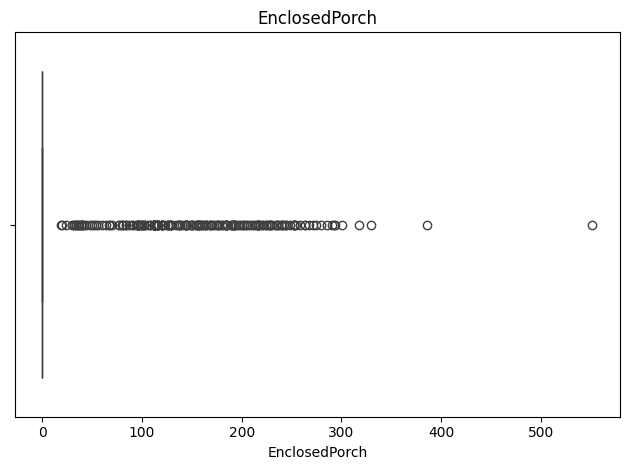

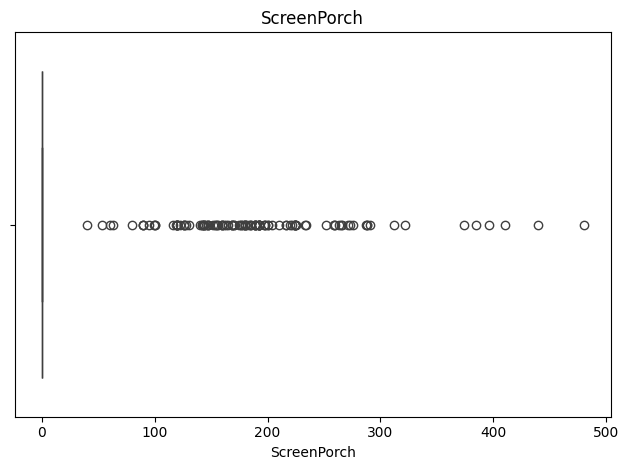

In [26]:
# Her bir numeric sütunu için aykırı değerleri belirleyin
for col in continuous_feature_train:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    if any((df_train[col] < lower_limit) | (df_train[col] > upper_limit)):
        sns.boxplot(x=df_train[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [27]:
def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR
        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir       
    return df
secilen_sutunlar = continuous_feature_train
df_test = aykiri_degerleri_min_max_sinirlar_ile_doldur(df_test, secilen_sutunlar)

def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR
        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir       
    return df
secilen_sutunlar = continuous_feature_train
df_train = aykiri_degerleri_min_max_sinirlar_ile_doldur(df_train, secilen_sutunlar)

In [28]:
def sütunlari_veri_türune_gore_grupla(df_train):
    result_dict = {}
    for col, dtype in df_train.dtypes.items():
        dtype_str = str(dtype)    
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []      
        result_dict[dtype_str].append(col)
    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'
    return result_str
# df_train DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_train)
# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice

object Veri Türü Sütunları:
MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

float64 Veri Türü Sütunları:
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, GrLivArea, GarageYr

In [29]:
from sklearn.preprocessing import LabelEncoder
kategorik__değişkeler = ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley',
                  'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' , 
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature']
le = LabelEncoder()
for i in kategorik__değişkeler:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450.0,Pave,1,3,3,0,4,...,0,NA,4,1,0,2,2008,8,4,208500
1,0,3,80.0,9600.0,Pave,1,3,3,0,2,...,0,NA,4,1,0,5,2007,8,4,181500
2,5,3,68.0,11250.0,Pave,1,0,3,0,4,...,0,NA,4,1,0,9,2008,8,4,223500
3,6,3,60.0,9550.0,Pave,1,0,3,0,0,...,0,NA,4,1,0,2,2006,8,0,140000
4,5,3,84.0,14260.0,Pave,1,0,3,0,2,...,0,NA,4,1,0,12,2008,8,4,250000


In [30]:
df_test = pd.get_dummies(df_test, drop_first=True,dtype =int, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
df_train = pd.get_dummies(df_train, drop_first=True,dtype =int, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,5,3,65.0,8450.0,1,3,3,0,4,5,...,2008,8,4,208500,1,1,0,1,0,0
1,0,3,80.0,9600.0,1,3,3,0,2,24,...,2007,8,4,181500,1,1,0,1,0,0
2,5,3,68.0,11250.0,1,0,3,0,4,5,...,2008,8,4,223500,1,1,0,1,0,0
3,6,3,60.0,9550.0,1,0,3,0,0,6,...,2006,8,0,140000,1,1,0,1,0,0
4,5,3,84.0,14260.0,1,0,3,0,2,15,...,2008,8,4,250000,1,1,0,1,0,0


In [31]:
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    df_test[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
    df_train[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [32]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,5,3,65.0,8450.0,1,3,3,0,4,5,...,2008,8,4,208500,1,1,0,1,0,0
1,0,3,80.0,9600.0,1,3,3,0,2,24,...,2007,8,4,181500,1,1,0,1,0,0
2,5,3,68.0,11250.0,1,0,3,0,4,5,...,2008,8,4,223500,1,1,0,1,0,0
3,6,3,60.0,9550.0,1,0,3,0,0,6,...,2006,8,0,140000,1,1,0,1,0,0
4,5,3,84.0,14260.0,1,0,3,0,2,15,...,2008,8,4,250000,1,1,0,1,0,0


In [33]:
result = sütunlari_veri_türune_gore_grupla(df_train)
print(result)


int64 Veri Türü Sütunları:
MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtFinSF2, TotalBsmtSF, HeatingQC, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageCars, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, MoSold, YrSold, SalePrice

int32 Veri Türü Sütunları:
MSZoning, Alley, LotShape, LandContour, Utilities, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, Electrical, Functional, GarageType, GarageFinish, Fence, MiscFeature, SaleType, SaleCondition, CentralAir_Y, Street_Pave, PavedDrive_P, PavedDrive_Y, LandSlope_Mod, LandSlope_Sev

float64 Veri Türü Sütunları:
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1,

In [34]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer
import pandas as pd

# RobustScaler : Aykırı değerlerin etkisini ortadan kaldıran ancak aykırı değerleri aynı ölçeğe koymayan sağlam standardizasyon gerçekleştirin.
robust_scaler = RobustScaler()
df_train[continuous_feature_train] = robust_scaler.fit_transform(df_train[continuous_feature_train])
df_test[continuous_feature_test] = robust_scaler.transform(df_test[continuous_feature_test])

# Quantile Transformation : Bu yöntem, özellikleri tekdüze veya normal bir dağılım izleyecek şekilde dönüştürür.
quantile_transformer = QuantileTransformer(output_distribution='normal')
df_train[continuous_feature_train] = quantile_transformer.fit_transform(df_train[continuous_feature_train])
df_test[continuous_feature_test] = quantile_transformer.transform(df_test[continuous_feature_test])

In [35]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,5,3,-0.365531,-0.387078,1,3,3,0,4,5,...,2008,8,4,208500,1,1,0,1,0,0
1,0,3,0.778225,0.062770,1,3,3,0,2,24,...,2007,8,4,181500,1,1,0,1,0,0
2,5,3,-0.260089,0.583496,1,0,3,0,4,5,...,2008,8,4,223500,1,1,0,1,0,0
3,6,3,-0.651824,0.024235,1,0,3,0,0,6,...,2006,8,0,140000,1,1,0,1,0,0
4,5,3,0.931971,1.265328,1,0,3,0,2,15,...,2008,8,4,250000,1,1,0,1,0,0


In [36]:
# İstediğimiz bir kolonun yerini değiştirip sona almak

yer_değiştir = df_train.pop('SalePrice')
df_train['SalePrice'] = yer_değiştir
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev,SalePrice
0,5,3,-0.365531,-0.387078,1,3,3,0,4,5,...,2008,8,4,1,1,0,1,0,0,208500
1,0,3,0.778225,0.062770,1,3,3,0,2,24,...,2007,8,4,1,1,0,1,0,0,181500
2,5,3,-0.260089,0.583496,1,0,3,0,4,5,...,2008,8,4,1,1,0,1,0,0,223500
3,6,3,-0.651824,0.024235,1,0,3,0,0,6,...,2006,8,0,1,1,0,1,0,0,140000
4,5,3,0.931971,1.265328,1,0,3,0,2,15,...,2008,8,4,1,1,0,1,0,0,250000


In [37]:
x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [38]:
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0,shuffle=True)

In [39]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# neg_mean_squared_error:
models = [
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ("AdaBoost", AdaBoostRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbosity=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

neg_mean_squared_error_list = []

for name, reg in models:
    cvs = cross_val_score(reg, 
                         x_test, y_test,
                         cv=5,
                         scoring="neg_mean_squared_error", n_jobs=-1)
    
    print("neg_mean_squared_error-->", cvs.mean(), name)
    
    neg_mean_squared_error_list.append(cvs.mean())
    neg_mean_squared_error_list.append(name)

neg_mean_squared_error--> -3593616508.977674 KNN
neg_mean_squared_error--> -5093011760.828989 CART
neg_mean_squared_error--> -1893313344.5463054 RF
neg_mean_squared_error--> -2255457621.496154 AdaBoost
neg_mean_squared_error--> -1964299595.3548827 GBM
neg_mean_squared_error--> -2187070393.643857 XGBoost
neg_mean_squared_error--> -1659128827.4664936 LightGBM
neg_mean_squared_error--> -1747629561.157861 CatBoost


In [40]:
# r2:
models = [
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ("AdaBoost", AdaBoostRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbosity=-1)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

r2_score_list = []

for name, reg in models:
    cvs = cross_val_score(reg, 
                         x_test, y_test,
                         cv=5,
                         scoring="r2", n_jobs=-1)
    
    print("r2-->", cvs.mean(), name)
    
    r2_score_list.append(cvs.mean())
    r2_score_list.append(name)

r2--> 0.4988672039191959 KNN
r2--> 0.5271450548548762 CART


r2--> 0.7590186504677241 RF
r2--> 0.7184782972462809 AdaBoost
r2--> 0.7513737287405385 GBM
r2--> 0.71821119867331 XGBoost
r2--> 0.7794460219396736 LightGBM
r2--> 0.7761201594745056 CatBoost


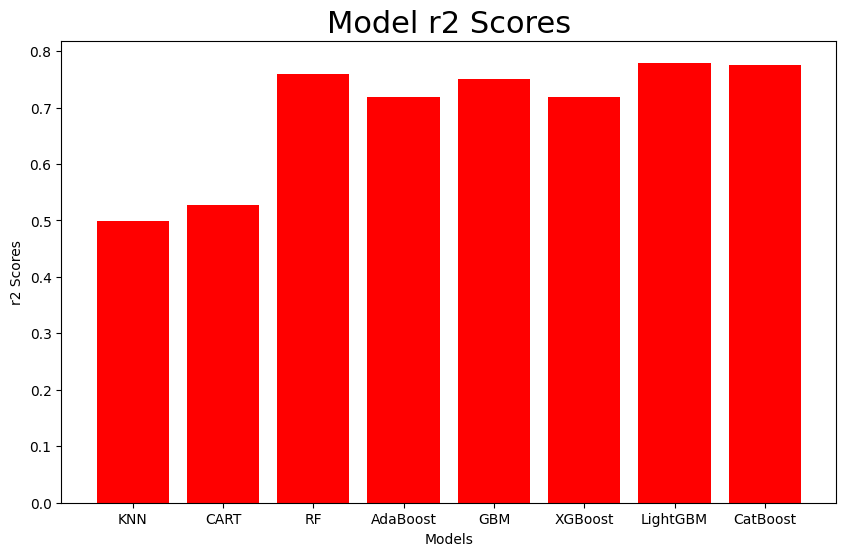

In [41]:
models = r2_score_list[1::2]
r2 = r2_score_list[::2]

plt.figure(figsize=(10, 6))
plt.bar(models, r2, color="red")
plt.xlabel('Models')
plt.ylabel('r2 Scores')
plt.title('Model r2 Scores', fontsize=22)
plt.show()

In [42]:
# lightgbm

import optuna
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_log_error
import optuna.logging
optuna.logging.set_verbosity(optuna.logging.WARNING)


cv = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = {}
best_rmsle = float('inf')

def objective(trial, x_train, y_train):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 300, 4000),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    model = LGBMRegressor(**params,verbose=-1)
    y_pred = cross_val_predict(model, x_train, y_train, cv=cv)
    rmsle = root_mean_squared_log_error(y_train, y_pred)
    global best_rmsle, best_params
    if rmsle < best_rmsle:
        best_rmsle = rmsle
        best_params = params
    return rmsle

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, x_train, y_train), n_trials=50)

print("Best Parameters for LightGBM:")
print("Best RMSLE:", best_rmsle)
print(best_params)

Best Parameters for LightGBM:
Best RMSLE: 0.12683349287060433
{'learning_rate': 0.03374938415972108, 'n_estimators': 788, 'max_depth': 4, 'subsample': 0.25576002336139686, 'colsample_bytree': 0.14805028193432673, 'min_child_weight': 10}


In [57]:
from lightgbm import LGBMRegressor
regressor = LGBMRegressor(learning_rate=0.03374938415972108,n_estimators=788,max_depth=4,subsample=0.25576002336139686,colsample_bytree=0.14805028193432673,min_child_weight=10,verbose=-1)
regressor.fit(x_train,y_train)

LGBMRegressor(colsample_bytree=0.14805028193432673,
              learning_rate=0.03374938415972108, max_depth=4,
              min_child_weight=10, n_estimators=788,
              subsample=0.25576002336139686, verbose=-1)

In [58]:
y_pred_train = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Train seti")
r2 = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
print("r2_Score:", r2)
print("mse:", mse)
print("mae:", mae)
print("rmse:", rmse)

print()

print("Test seti")
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("r2_Score:", r2)
print("mse:", mse)
print("mae:", mae)
print("rmse:", rmse)

Train seti
r2_Score: 0.974458888885197
mse: 157255604.2833869
mae: 8225.745569597417
rmse: 12540.159659405732

Test seti
r2_Score: 0.8574086750854926
mse: 984714296.0280715
mae: 16530.32114227156
rmse: 31380.15768010211


test verisi üzerinde tahmin işlemleri

In [60]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,MoSold,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,0,2,0.778225,0.681504,1,3,3,0,4,12,...,6,2010,8,4,1,1,0,1,0,0
1,0,3,0.869846,1.266017,1,0,3,0,0,12,...,6,2010,8,4,1,1,0,1,0,0
2,5,3,0.451469,1.173349,1,0,3,0,4,8,...,3,2010,8,4,1,1,0,1,0,0
3,5,3,0.637923,0.181727,1,0,3,0,4,8,...,6,2010,8,4,1,1,0,1,0,0
4,11,3,-1.421556,-1.280095,1,0,1,0,4,22,...,1,2010,8,4,1,1,0,1,0,0


In [61]:
test = df_test.iloc[:, :].values

In [62]:
y_predd = regressor.predict(test)

In [63]:
submission = pd.read_csv("sample_submission.csv",delimiter=",")
submission.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [64]:
submission["SalePrice"] = y_predd
submission.head(3)

,Id,SalePrice
0,1461,116974.406574
1,1462,166310.633232
2,1463,185132.830709


In [65]:

# Temizlenmiş veriyi CSV dosyasına kaydetmek

submission.to_csv('submission1.csv', index=False)
